<h1 style="text-align: center;"> Lab Ex. 2: Regression Analysis</h1>

 <h2 style="text-align: center;">Name: Neelanajn Dutta </h2>

<h2 style="text-align: center;">Registration Number: 2448040 </h2>

### Import Libraries: 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data preprocessing:

In [5]:
df_auto=pd.read_csv("D:/lab 2/auto.csv")

In [6]:
df_auto.head() #Showing first five values

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
print("No. of Records:",df_auto.shape[0])   #Gives the number of rows
print("No. of Features:", df_auto.shape[1]) #Gives the number of columns
print('Features:', df_auto.columns)         #Gives the names of the columns

No. of Records: 398
No. of Features: 9
Features: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [8]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
non_numeric_cols = df_auto.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)

['horsepower', 'car name']


In [10]:
# Drop the 'car name' column as it is irrelevant for regression
df_auto = df_auto.drop(columns=['car name'])

In [11]:
# Replace '?' with NaN in the 'horsepower' column and drop rows with missing values (only 6 are there out of 398)

df_auto['horsepower'] = df_auto['horsepower'].replace('?', np.nan)
df_auto = df_auto.dropna(subset = 'horsepower' )

In [12]:
df_auto['horsepower'] = pd.to_numeric(df_auto['horsepower'], errors='coerce')

## Data Exploration:

In [13]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


In [14]:
df_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Checking missing values:

In [15]:
#Checking for missing values
df_auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [16]:
# Define Features and Target variable

X = df_auto.drop(columns=['mpg'])  # Features (independent variables)
y = df_auto['mpg']  # Target variable (dependent variable)

### Checking assumptions:

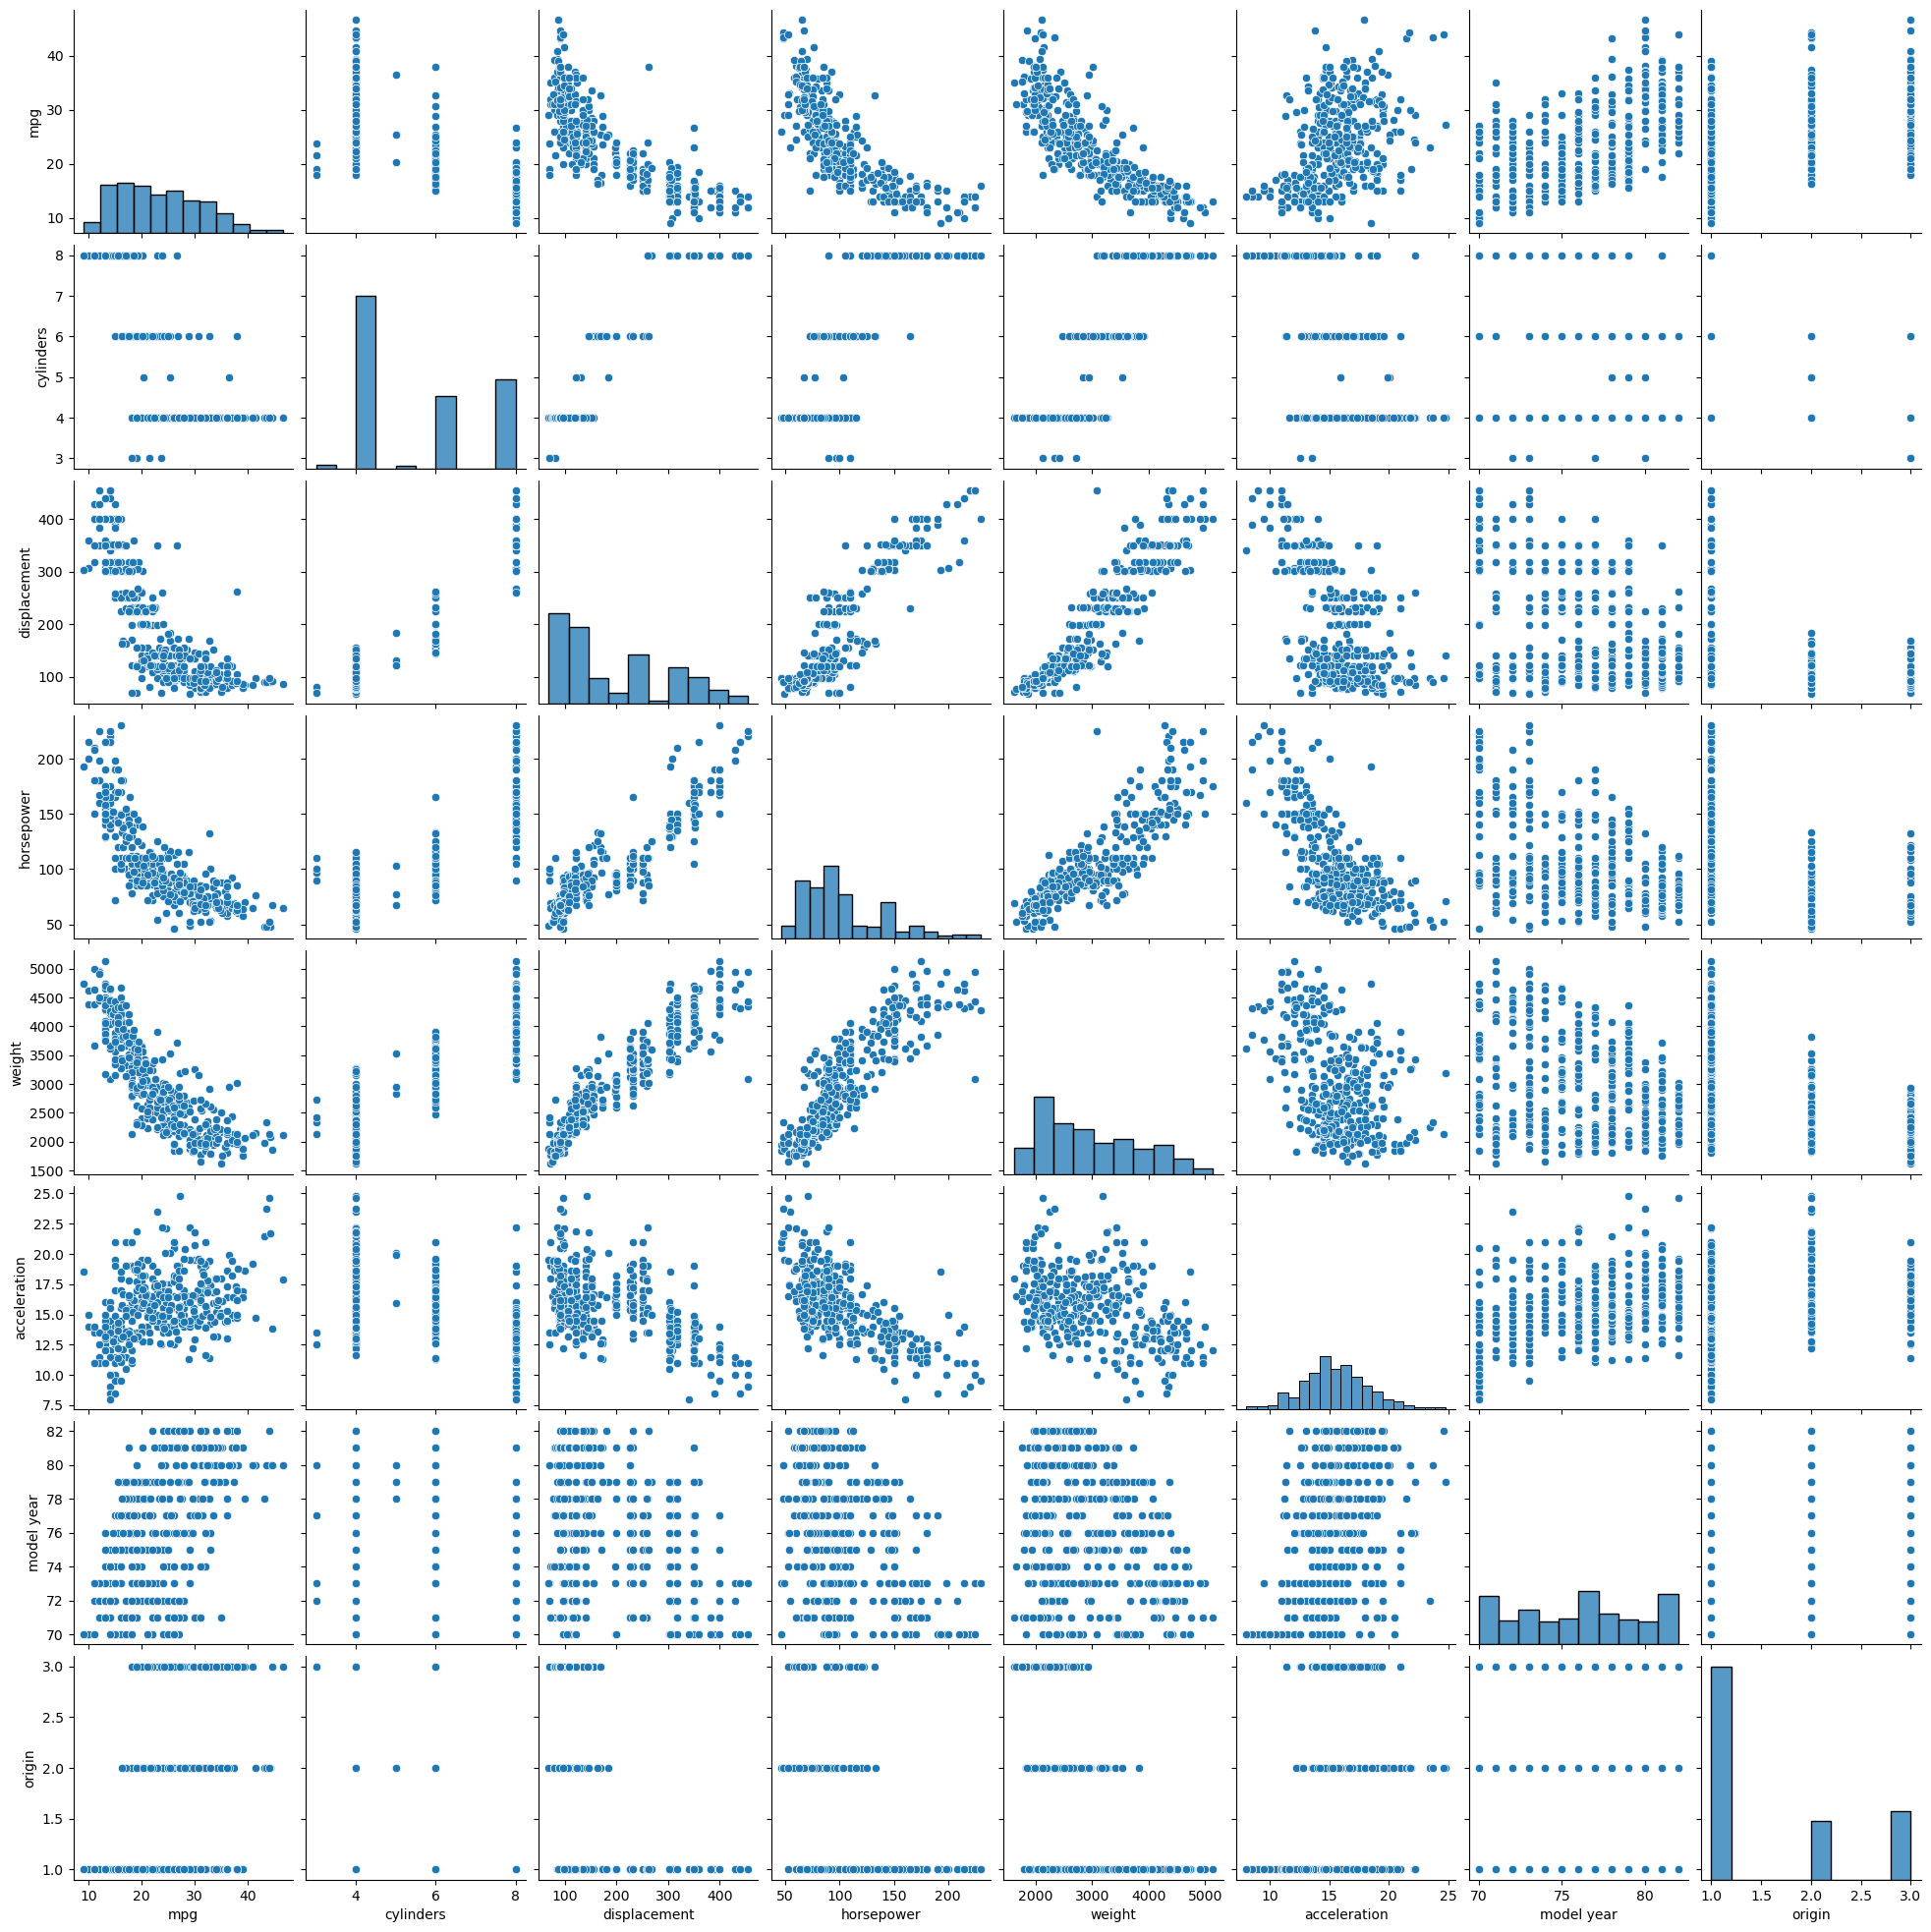

In [18]:
# Pairplot to check linearity
sb.pairplot(df_auto)
plt.show()

##### Strong Positive Correlation: Some feature pairs (diagonal upward patterns) indicate direct proportionality. Suggests a strong relationship; check for multicollinearity (VIF test).
##### Strong Negative Correlation: Some pairs have downward trends, meaning an inverse relationship. Consider log/square transformations to linearize.
##### No Clear Correlation: Some scatter plots show randomly scattered points, indicating no strong relationship. Example: These features may not contribute much to the model.
##### Normally Distributed Features: Bell-shaped histograms indicate good distribution for regression.
##### Skewed Distributions: Some histograms lean left or right, meaning outliers or skewed data. Apply log transformation to fix this.

### Multicollinearity:

In [21]:
# Check Multicollinearity bet the different independent feataures using (VIF)
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif)

Variance Inflation Factor (VIF):
        Feature         VIF
0     cylinders  117.708547
1  displacement   96.909762
2    horsepower   67.072154
3        weight  139.454162
4  acceleration   69.699769
5    model year  115.794614
6        origin    8.469942


High VIF → Strong multicollinearity (>10)
, Low VIF → Low multicollinearity (bet 1-5)

### Splitting train and test dataset:

In [22]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Size of the Train and Test dataset
print('Train Set:',X_train.shape[0], X_train.shape[1])
print('Test Set',X_test.shape[0], X_test.shape[1])

Train Set: 294 7
Test Set 98 7


## Model building:

In [23]:
# Model Fitting
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Print the intercept and coefficients
print('Intercept = ', mlr.intercept_)
print('Coefficient = ', mlr.coef_)

Intercept =  -17.93882554028429
Coefficient =  [-0.40160951  0.01504249 -0.02149434 -0.00605506  0.03358457  0.76255978
  1.62151113]


### Checking assumptions:

### Homoscedasticity (Constant variance of residuals)

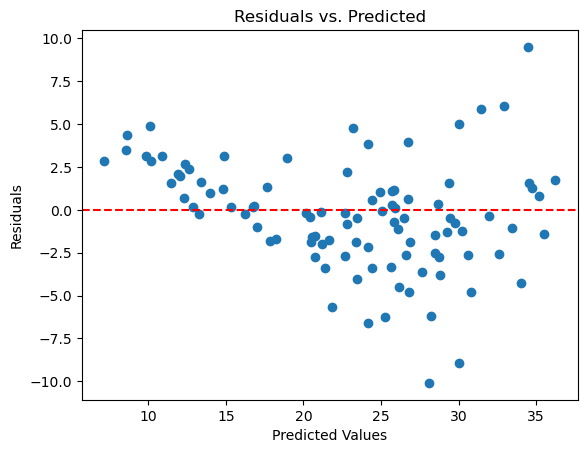

In [25]:
# Get model predictions
y_pred = mlr.predict(X_test)

# Plot residuals
plt.scatter(y_pred, (y_test - y_pred))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")
plt.show()

### Residuals randomly scattered i.e (no pattern) then Homoscedasticity is satisfied

### Normality of Residuals (Residuals should be normally distributed)

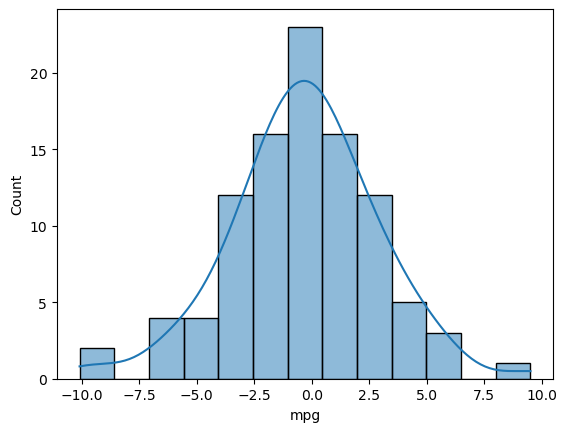

In [26]:
# Plot residual distribution
residuals = y_test - y_pred
sb.histplot(residuals, kde=True)
plt.show()

### No Autocorrelation (Residuals should be independent)

In [27]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistic
dw = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw)

Durbin-Watson Statistic: 1.8012251806833723


Ideal Value ~ 2. If <1 or >3, there is autocorrelation.

### Prediction of the Test Set:

In [28]:
y_pred = mlr.predict(X_test)
print("Prediction for test set:",y_pred)

Prediction for test set: [25.91303523 26.12910737 34.52982347 24.93310225 28.49389549 30.62299852
  8.64022673 30.77995428 20.58125745 28.68439733 12.60514006 25.2750779
 16.74564285 29.750124   21.85027326 29.2842409  20.41026194 33.43396256
 26.75583098 30.01570774 18.95524852 34.49798593 35.51192872 14.85886972
 28.50990255 25.710153   21.15403876 16.23964765 28.73291972 24.18890877
 13.3957165  23.44898051 20.71687287 31.96065246 12.3027592  36.2421492
 10.88685683 24.42553405 11.44467681  7.16910345 12.85445469 27.62543195
 34.74137225 26.47009086 12.01553634  9.83282145 17.65703326 31.4221605
 24.41817522 30.249778   11.90351908 26.60855424 23.20136195 35.17082202
 28.21302893 17.83159292 20.18860141 22.69835305 22.80636978 26.09837043
  8.53562308 22.69417688 25.73034008 23.46947358 30.04124755 28.78154223
 25.81780474 29.48050131 21.64143675 10.09718638 22.83387797 13.25090136
 26.78639753 28.09867778 24.17464391 24.13579399 14.00472271 14.8137644
 25.85577908 20.48159976 25.08

### Evaluation model:

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print('Mean Absolute Error = ', mae)
print('Mean Absolute Percentage Error = ', mape)
print('Mean Squared Error = ', mse)
print('Root Mean Squared Error = ', rmse)
print('R2 Square = ', r_squared)

Mean Absolute Error =  2.408608403006934
Mean Absolute Percentage Error =  0.115808571063177
Mean Squared Error =  10.142558454927437
Root Mean Squared Error =  3.1847383652236547
R2 Square =  0.7988908872869828


### Vuzualizing error:

Text(0, 0.5, 'Predicted')

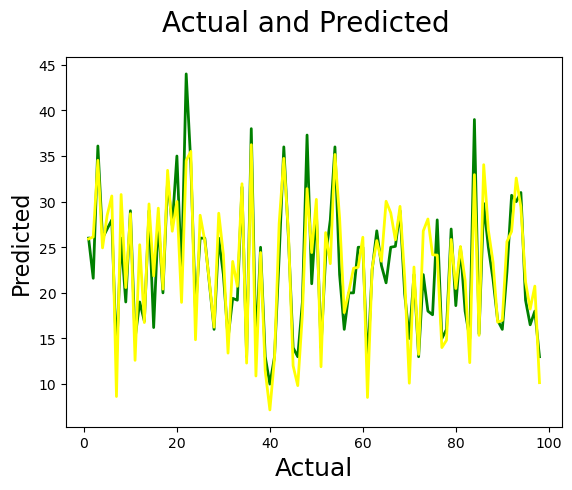

In [30]:
# Actual vs Predicted

c = [i for i in range(1,len(y_test)+1,1)]         
fig = plt.figure()
plt.plot(c,y_test, color="green", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="yellow",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                              
plt.ylabel('Predicted', fontsize=16)   

### Prediction for a new unseen record:

In [31]:
# Define the new record as a DataFrame with appropriate column names
new_rec = pd.DataFrame(
    [[8, 403, 210, 3500, 7.5, 85, 1]],
    columns=X.columns  # Using the same feature names as the training data
)

# Make the prediction
print('Predicted Sales is:')
print(mlr.predict(new_rec))

Predicted Sales is:
[25.89488758]
